For my second iteration as detailed in the word document, I decided to take in a wider array of car types and let them represent the Irish car population. I then used Python classes to speed up the process. Some data was harvested via webscraping (the code being in the next file)

In [21]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [44]:
class Total:
    def __init__(self,tyre_marking,title):
        self.tyre_marking = tyre_marking
        self.title = title
        
    def num_checker(self):
        self.lst = []
        for x in self.tyre_marking:
            if x.isdigit():
                self.lst.append(x)
            else:
                pass
        
        
    def aspect_ratio(self):
        self.aspect_ratio = self.lst[3:5]
        self.aspect_ratio = int("".join(map(str, self.aspect_ratio)))
        
        
    def tyre_width(self):
        self.tyre_width = self.lst[0:3]
        self.tyre_width = int("".join(map(str, self.tyre_width)))
        
        
    def rim_diameter(self):
        self.rim_diameter = self.lst[5:7]
        self.rim_diameter = (int("".join(map(str,self.rim_diameter)))*25.4)
        
    
    def final(self):
        self.tyre_sidewall_height = ((self.aspect_ratio*self.tyre_width)/100)
        self.wheel_diameter = (self.rim_diameter + (2*self.tyre_sidewall_height))
        self.radius_wheel = ((0.95 * (self.wheel_diameter/2))/1000)
        print(f'Radius of wheel in metres {self.radius_wheel}')
        
        
        
        
    #section for engine speed
    def rpm_list(self,gbox1,gbox2,gbox3,gbox4,gbox5,gbox6,final_gbox):
        self.gbox1  = gbox1
        self.gbox2 = gbox2
        self.gbox3  = gbox3
        self.gbox4 = gbox4
        self.gbox5  = gbox5
        self.gbox6 = gbox6
        self.final_gbox = final_gbox
        self.rpm_lst = list(map(str,range(0,4501,50)))
        self.rpm_lst[0:] = map(int,self.rpm_lst[0:])
        self.other_rpm_lst = []
        
        for i in self.rpm_lst:
            
            i = int(i)
            revolutions_per_minute = i
            final_drive_ratio = 4.85 

            if i < 2000:
                gearbox_ratio = self.gbox1 
            elif i >= 2000 and i < 2500:
                gearbox_ratio = (self.gbox2 + self.gbox3)/2
            elif i >=2500 and i < 3000:
                gearbox_ratio = (self.gbox4 + self.gbox5)/2 
            elif i >=3000 and i <= 3500:
                gearbox_ratio = self.gbox6 
            else:
                pass

            engine_speed = ((revolutions_per_minute*math.pi*self.radius_wheel*3.6 )/(30*gearbox_ratio*self.final_gbox)) #in kmhr**-1
            engine_speed*= 1/3.6
            self.other_rpm_lst.append(engine_speed)
        
        
        
        
        
    #drag force
    def drag_force(self,drag_coefficient,frontal_area):
        self.drag_coefficient = drag_coefficient
        self.frontal_area = frontal_area
        self.drag_force_lst = []
        for u in self.other_rpm_lst:
            p = 1.2754 #air density
            c_d = self.drag_coefficient ###########
            A = self.frontal_area #############
            N = 0.5*p*(u**2)*c_d*A
            self.drag_force_lst.append(N)
        

    def total_litres_finder(self,rolling_resistance,mass):
        self.rolling_resistance = rolling_resistance
        self.mass = mass
        self.total_litres_km_lst = []
        for drag_resistance in self.drag_force_lst:

            work_output = drag_resistance * 1000 
            work_output /= 1000 

            efficiency = 0.28 
            fuel_energy_input = work_output / efficiency

            energy_litre = 40 
            drag_no_of_litres = fuel_energy_input / (energy_litre*1000)
 
            
            g = 9.81 

            total_rolling_resistance = self.rolling_resistance * self.mass * g * 1000 #force * distance
            total_rolling_resistance /= 1000 #Convert to KJ


            fuel_energy_input = total_rolling_resistance / efficiency

            energy_litre = 40 
            rolling_no_of_litres = fuel_energy_input / (energy_litre*1000)

            total_litres_km = rolling_no_of_litres+ drag_no_of_litres

            self.total_litres_km_lst.append(total_litres_km)
            
    def list_changer(self):
        self.other_rpm_lst = [x for x in self.other_rpm_lst if x > 15]
        del self.total_litres_km_lst[0:50]

        

    def graph(self):
        x = self.other_rpm_lst
        y= self.total_litres_km_lst
        plt.plot(x,y)
        plt.title(self.title)
        plt.xlabel('Gross Speed m/s')
        plt.ylabel('Litres used per km for rolling and drag resistance L')
        plt.show()
        #100km/hr = 27.778 metres per second
        FuelAt100kmhr = np.interp(27.778, x,y)
        #120 kmhr = 33.333 ms-1 (3dp)
        FuelAt120kmhr = np.interp(33.333, x,y)
        PercentChange = ((FuelAt120kmhr - FuelAt100kmhr)/FuelAt120kmhr)*100
        print(f"Approximated reduction in carbon emissions: {round(PercentChange,3)}%")


Radius of wheel in metres 0.3520224999999999


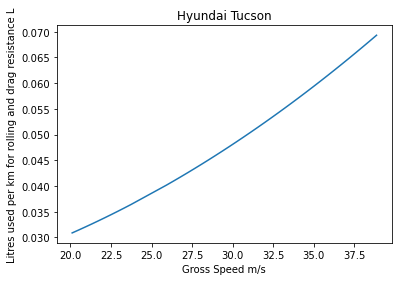

Approximated reduction in carbon emissions: 21.284%


In [45]:
#Checking to make sure okay
HyundaiTucson = Total('235/55R19', 'Hyundai Tucson') #Passing in variables
HyundaiTucson.num_checker()
HyundaiTucson.aspect_ratio()
HyundaiTucson.tyre_width()
HyundaiTucson.rim_diameter()
HyundaiTucson.final()
HyundaiTucson.rpm_list(3.93,2.32,2.04,1.07,0.82,0.88,4.85) #tuple / set?
HyundaiTucson.drag_force(0.33,1.85) #same?
HyundaiTucson.total_litres_finder(0.012,1600) #same?
HyundaiTucson.list_changer()
HyundaiTucson.graph()

In [ ]:
#Harvested data
= Total()
.num_checker()
.aspect_ratio()
.tyre_width()
.rim_diameter()
.final()
.rpm_list()
.drag_force()
.total_litres_finder()
.graph()

Radius of wheel in metres 0.3013875


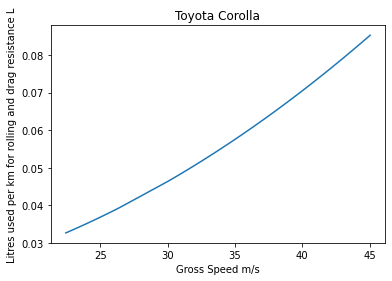

Approximated reduction in carbon emissions: 21.679%


In [47]:
ToyotaCorolla = Total('195/65R15','Toyota Corolla')
ToyotaCorolla.num_checker()
ToyotaCorolla.aspect_ratio()
ToyotaCorolla.tyre_width()
ToyotaCorolla.rim_diameter()
ToyotaCorolla.final()
ToyotaCorolla.rpm_list(3.545,1.904,1.31,0.969,0.815,0.80,3.941)
ToyotaCorolla.drag_force(0.29,2.0903175)
ToyotaCorolla.total_litres_finder(0.012,1450)
ToyotaCorolla.list_changer()
ToyotaCorolla.graph()

Radius of wheel in metres 0.327655


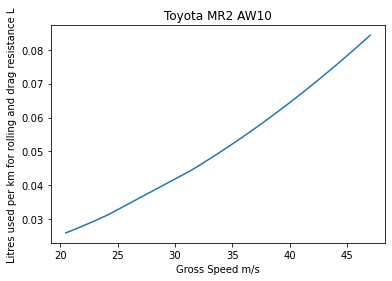

Approximated reduction in carbon emissions: 21.959%


In [48]:
#Harvested data
ToyotaChr = Total('215/60R17 ','Toyota MR2 AW10')
ToyotaChr.num_checker()
ToyotaChr.aspect_ratio()
ToyotaChr.tyre_width()
ToyotaChr.rim_diameter()
ToyotaChr.final()
ToyotaChr.rpm_list(3.17,1.90,1.39,1.03,0.82,0.725,4.529)
ToyotaChr.drag_force(0.34,1.683)
ToyotaChr.total_litres_finder(0.012,1166)
ToyotaChr.list_changer()
ToyotaChr.graph()

Radius of wheel in metres 0.30247999999999997


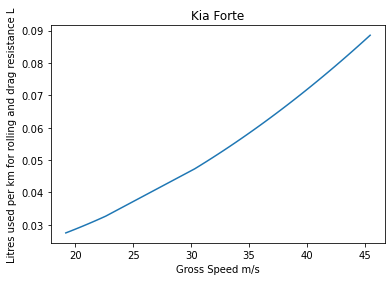

Approximated reduction in carbon emissions: 21.659%


In [49]:
#Harvested data
KiaForte = Total('205/50R17','Kia Forte')
KiaForte.num_checker()
KiaForte.aspect_ratio()
KiaForte.tyre_width()
KiaForte.rim_diameter()
KiaForte.final()
KiaForte.rpm_list(3.308,1.962,1.323,1.024,0.825,0.702,4.467)
KiaForte.drag_force(0.29,2.17857535)
KiaForte.total_litres_finder(0.012,1356)
KiaForte.list_changer()
KiaForte.graph()

Radius of wheel in metres 0.3440425


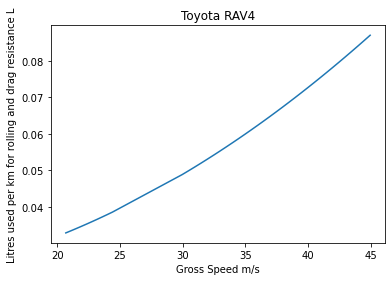

Approximated reduction in carbon emissions: 20.146%


In [52]:
#Harvested data
ToyotaRAV4 = Total('225/65R17','Toyota RAV4')
ToyotaRAV4.num_checker()
ToyotaRAV4.aspect_ratio()
ToyotaRAV4.tyre_width()
ToyotaRAV4.rim_diameter()
ToyotaRAV4.final()
ToyotaRAV4.rpm_list(3.833,1.913,1.258,0.918,0.847,0.731,4.933)
ToyotaRAV4.drag_force(0.32,1.8673503)
ToyotaRAV4.total_litres_finder(0.012,1740)
ToyotaRAV4.list_changer()
ToyotaRAV4.graph()

In [54]:
Tucson = 21.284 * 6116 #Cars reduction percentage * Units sold in 2022
Corolla = 21.679 * 3962
Chr = 21.959 * 2913
Forte = 21.659 * 2888
Rav4 = 20.146 * 2686
total_mean_reduction = (Tucson + Corolla + Chr + Forte + Rav4) / (6116 + 3962 + 2913 + 2888 + 2686)
print(f"Total projected mean reduction in carbon emissions: {round(total_mean_reduction,3)} %")


Total projected mean reduction in carbon emissions: 21.368 %
